# A linear regression learning algorithm example using TensorFlow library.

Linear regression model is one of the simplest regression models. It assumes linear relationship between X and Y. The output equation is defined as follows:
$$\hat{y} = WX + b$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#  Training Parameters
learning_rate = 1e-1
training_epochs = 2000
display_step = 200

200
(200, 1) (200, 1)


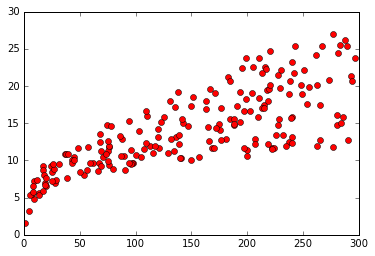

In [3]:
# Load data. Advertising dataset from "An Introduction to Statistical Learning",
# textbook by Gareth James, Robert Tibshirani, and Trevor Hastie 
import numpy as np
data = pd.read_csv('dataset/Advertising.csv',index_col=0)
train_X = data[['TV']].values 

train_Y = data.Sales.values 
train_Y = train_Y[:,np.newaxis]

n_samples = train_X.shape[0]
print n_samples
print train_X.shape, train_Y.shape
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.show()

In [4]:
import tensorflow as tf
# Define tf Graph Inputs
X = tf.placeholder("float",[None,1])
y = tf.placeholder("float",[None,1])

# Create Model variables 
# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.add(tf.mul(X, W), b)

In [5]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(y_pred-y,2))/(2*n_samples) #L2 loss

# Define the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) #Gradient descent

Epoch: 0001 cost= 11.784294128 W= 0.085883 b= -0.113122
Epoch: 0201 cost= 5.516845703 W= 0.0548285 b= 5.59834
Epoch: 0401 cost= 5.256753445 W= 0.0478319 b= 6.97454
Epoch: 0601 cost= 5.256326675 W= 0.0475391 b= 7.03211
Epoch: 0801 cost= 5.256326675 W= 0.0475367 b= 7.03259
Epoch: 1001 cost= 5.256326675 W= 0.0475367 b= 7.03259
Epoch: 1201 cost= 5.256326675 W= 0.0475367 b= 7.03259
Epoch: 1401 cost= 5.256327629 W= 0.0475367 b= 7.03259
Epoch: 1601 cost= 5.256326675 W= 0.0475367 b= 7.03259
Epoch: 1801 cost= 5.256326675 W= 0.0475367 b= 7.03259
Optimization Finished!
cost= 5.25679 W= 0.047714 b= 7.03275


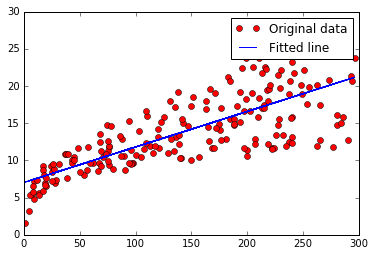

In [6]:
# Initializing the variables
init = tf.initialize_all_variables()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, y: train_Y})       

        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

### Multiple Linear Regression
Let's use three features as input vector : TV,Radio,Newspaper

In [7]:
# Parameters
learning_rate = 1e-2
training_epochs = 2000
display_step = 200

In [8]:
import numpy as np
data = pd.read_csv('dataset/Advertising.csv',index_col=0)
train_X = data[['TV','Radio','Newspaper']].values
train_Y = data.Sales.values 
train_Y = train_Y[:,np.newaxis]
n_samples = train_X.shape[0]
print n_samples
print train_X.shape, train_Y.shape


200
(200, 3) (200, 1)


In [9]:
# Define tf Graph Inputs
X = tf.placeholder("float",[None,3])
y = tf.placeholder("float",[None,1])

# Create Model variables 
# Set model weights
W = tf.Variable(tf.zeros([3, 1]),name="bias")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.matmul(X, W) + b

In [10]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(y_pred-y,2))/(2*n_samples) #L2 loss

# Define the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) #Gradient descent

In [11]:
# Initializing the variables
init = tf.initialize_all_variables()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, y: train_Y})
        
        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)
    

Epoch: 0001 cost= 82.582122803 W= [[ 0.01]
 [ 0.01]
 [ 0.01]] b= -0.0523979
Epoch: 0201 cost= 1.893708944 W= [[ 0.05290034]
 [ 0.21892916]
 [ 0.01481084]] b= 0.317586
Epoch: 0401 cost= 1.733524442 W= [[ 0.05165334]
 [ 0.21358487]
 [ 0.01205258]] b= 0.776219
Epoch: 0601 cost= 1.595638394 W= [[ 0.05031172]
 [ 0.20787258]
 [ 0.00907042]] b= 1.26902
Epoch: 0801 cost= 1.499344826 W= [[ 0.04906565]
 [ 0.20257007]
 [ 0.00630054]] b= 1.72667
Epoch: 1001 cost= 1.441991091 W= [[ 0.04801662]
 [ 0.1981075 ]
 [ 0.0039686 ]] b= 2.11191
Epoch: 1201 cost= 1.412463188 W= [[ 0.04720414]
 [ 0.19465184]
 [ 0.00216249]] b= 2.41028
Epoch: 1401 cost= 1.399316430 W= [[ 0.046623  ]
 [ 0.19218031]
 [ 0.00087063]] b= 2.62369
Epoch: 1601 cost= 1.394282937 W= [[  4.62394804e-02]
 [  1.90549284e-01]
 [  1.80471652e-05]] b= 2.76452
Epoch: 1801 cost= 1.392640352 W= [[ 0.04600676]
 [ 0.18955962]
 [-0.00049928]] b= 2.84998
Optimization Finished!
cost= 1.39219 W= [[ 0.04587805]
 [ 0.18901226]
 [-0.0007854 ]] b= 2.89725
